In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import statsmodels

In [2]:
aapl = yf.Ticker("AAPL")

In [3]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() 

data = pdr.get_data_yahoo("AAPL", start="2023-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


## Compute Daily Return

Let $X_t$ be the adjusted close price for stock at day $t$, then the daily return $Y_t$ is computed as:

$$ Y_t = \frac{X_t - X_{t-1}}{X_{t-1}}$$

In [6]:
data['Adj Close'].diff() 

Date
2023-01-03         NaN
2023-01-04    1.279472
2023-01-05   -1.329056
2023-01-06    4.562408
2023-01-09    0.525665
                ...   
2023-12-22   -1.077133
2023-12-26   -0.548553
2023-12-27    0.099716
2023-12-28    0.428879
2023-12-29   -1.047241
Name: Adj Close, Length: 250, dtype: float64

In [7]:
data['Adj Close']

Date
2023-01-03    124.048042
2023-01-04    125.327515
2023-01-05    123.998459
2023-01-06    128.560867
2023-01-09    129.086533
                 ...    
2023-12-22    193.091385
2023-12-26    192.542831
2023-12-27    192.642548
2023-12-28    193.071426
2023-12-29    192.024185
Name: Adj Close, Length: 250, dtype: float64

In [8]:
data['Adj Close Prev'] = data['Adj Close'].shift(periods=1)

In [9]:
data

,Open,High,Low,Close,Adj Close,Volume,Adj Close Prev
Date,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600,124.048042
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700,125.327515
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,123.998459
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800,128.560867
...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,194.168518
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300,193.091385
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,192.542831


In [10]:
data['Daily Return'] = (data['Adj Close'] - data['Adj Close Prev'])/data['Adj Close Prev']

In [11]:
data

,Open,High,Low,Close,Adj Close,Volume,Adj Close Prev,Daily Return
Date,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600,124.048042,0.010314
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700,125.327515,-0.010605
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,123.998459,0.036794
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800,128.560867,0.004089
...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,194.168518,-0.005547
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300,193.091385,-0.002841
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,192.542831,0.000518


Text(0, 0.5, 'Daily return')

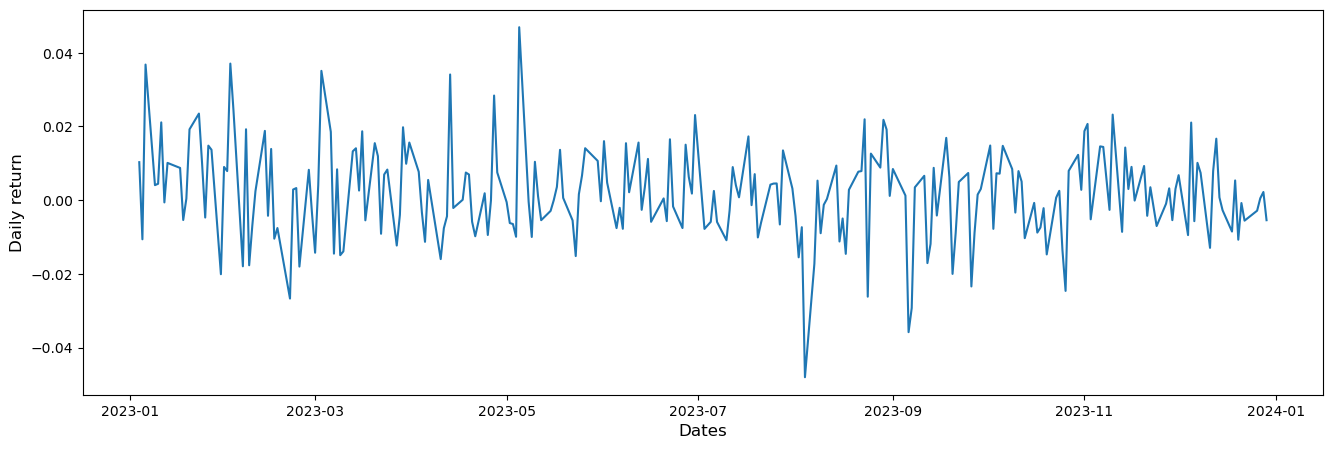

In [12]:
plt.figure(figsize=(16,5))

plt.plot(data.index,data['Daily Return'].values)
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Daily return', fontsize=12)

Text(0, 0.5, 'Adjusted Close')

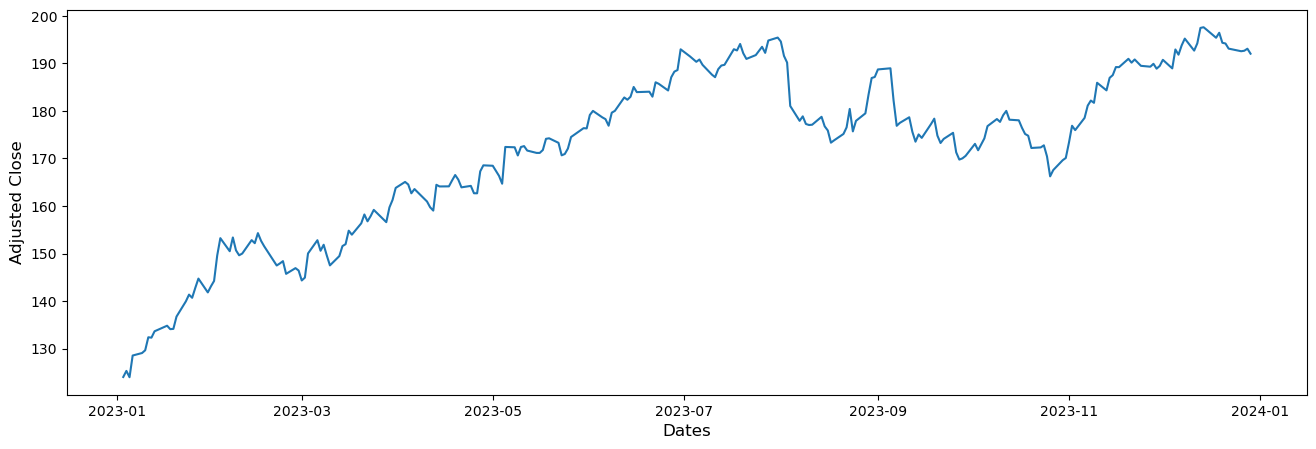

In [13]:
plt.figure(figsize=(16,5))

plt.plot(data.index,data['Adj Close'].values)
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Adjusted Close', fontsize=12)

## ADF Test for stationarity

Null hypothesis: Time series is not stationary \
Alternative hypothesis: If null hypothesis is rejected, then time series is stationary.

Use adfuller from statsmodels to test for stationary.

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adf_daily_return = adfuller(data['Daily Return'][1:].values)
print("ADF test for daily return:")
print()
print("ADF Statistics:", adf_daily_return[0])
print("p-value:", adf_daily_return[1])

ADF test for daily return:

ADF Statistics: -14.864341155892523
p-value: 1.7004282683475263e-27


p-value < 0.05 (for 95% confidence level). The null hypothesis is rejected, so the time series is stationary.

In [16]:
adf_adj_close = adfuller(data['Adj Close'].values)
print("ADF test for Adj Close:")
print()
print("ADF Statistics:", adf_adj_close[0])
print("p-value:", adf_adj_close[1])

ADF test for Adj Close:

ADF Statistics: -2.5861222747316317
p-value: 0.09589956712768855


p-value > 0.05 (for 95% confidence level). The null hypothesis is NOT rejected, so the time series is NOT stationary.

This concludes that the daily return time series is stationary, and adj close time series is NOT stationary.

## KPSS Test for stationary

Null hypothesis: Time series is stationary around a deterministic trend (i.e. trend-stationary) \
Alternative hypothesis: Time series is a non-stationary unit root.

Note that KPSS Test determines if series is stationary around a mean or linear trend, or non stationary due to a unit root.

In [17]:
from statsmodels.tsa.stattools import kpss

In [18]:
kpss_daily_return = kpss(data['Daily Return'][1:].values)

print("KPSS test for daily return:")
print()
print("KPSS Statistics:", kpss_daily_return[0])
print("p-value:", kpss_daily_return[1])

KPSS test for daily return:

KPSS Statistics: 0.3691593772155423
p-value: 0.09044854430364554


Since p > 0.05, the null hypothesis is rejected. Thus, this time series is is stationary around a mean or linear trend. Because the ACF test confirms that this is a stationary process, this process is difference stationary.

In [19]:
kpss_adj_close = kpss(data['Adj Close'].values)

print("KPSS test for Adj Close:")
print()
print("KPSS Statistics:", kpss_adj_close[0])
print("p-value:", kpss_adj_close[1])

KPSS test for Adj Close:

KPSS Statistics: 1.715952517722799
p-value: 0.01


C:\Users\teres\AppData\Local\Temp\ipykernel_14152\741391692.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_adj_close = kpss(data['Adj Close'].values)


Since p < 0.05, the null hypothesis is rejected. Thus, this time series is non-stationary due to a unit root. Because the ACF test also concludes that this is a non-stationary process, this process is non-stationary.

## Why should we use both ADF and KPSS tests?

Because ADF tests for stationary, while KPSS tests for unit root. We will have the following 4 cases:

Case 1: Both ADF and KPSS tests conclude that the time series are stationary (just like our Daily Return). Then the series is stationary. \
Case 2: Both ADF and KPSS tests conclude that the time series are non-stationary (just like our Adj Close). Then the series is non-stationary. \
Case 3: KPSS indicates stationary while ADF indicates non-stationary. Then the series is trend stationary. To make the series strict stationary, remove the trend. The detrended series is checked for stationarity. \
Case 4: KPSS indicates non-stationary and ADF indicates stationary. Then the series is difference stationary. Differencing will make series stationary. The differenced series is checked for stationarity.

https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html?fbclid=IwZXh0bgNhZW0CMTAAAR03JaiW7WRnorhclQ4j-KvauL8RUnFcFctYIwgIuDIxjKoghJHFx-7JmYw_aem_AfsirxwMm_TAzO90SPYRO4LoqnojF6Xmb4zO2gsNLAxnzHx9AyXUKHwKLGOVYM5gViQQ5me4J9bmgbJi3iE6YXAj

## Remove five dates from data frame (including open, close, high, low, volume and adj close) 

In [20]:
df = pdr.get_data_yahoo("AAPL", start="2023-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [21]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086533,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [22]:
df.index = pd.to_datetime(df.index)

In [23]:
df['Adj Close Prev'] = df['Adj Close'].shift(periods=1)
df['Daily Return'] = (df['Adj Close'] - df['Adj Close Prev'])/df['Adj Close Prev']

In [24]:
# Make a copy of df
df_remove = df.copy()

In [25]:
random_state=3241
np.random.seed(random_state)

missing_dates = np.random.choice(df_remove.index, size=5, replace=False)

In [26]:
#missing_dates
missing_dates = sorted(missing_dates)

In [27]:
df_remove.loc[missing_dates,['Open','High','Low','Close','Adj Close','Volume']] = np.nan

In [28]:
df_remove.loc[missing_dates]

,Open,High,Low,Close,Adj Close,Volume,Adj Close Prev,Daily Return
Date,,,,,,,,
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN,128.560867,0.004089
2023-01-20,NaN,NaN,NaN,NaN,NaN,NaN,134.164703,0.019221
2023-04-05,NaN,NaN,NaN,NaN,NaN,NaN,164.527466,-0.011290
2023-04-24,NaN,NaN,NaN,NaN,NaN,NaN,163.921524,0.001878
2023-09-12,NaN,NaN,NaN,NaN,NaN,NaN,178.653427,-0.017061


In [29]:
df_remove

,Open,High,Low,Close,Adj Close,Volume,Adj Close Prev,Daily Return
Date,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500.0,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600.0,124.048042,0.010314
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700.0,125.327515,-0.010605
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700.0,123.998459,0.036794
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN,128.560867,0.004089
...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800.0,194.168518,-0.005547
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300.0,193.091385,-0.002841
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700.0,192.542831,0.000518


In [30]:
df_remove.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            245 non-null    float64
 1   High            245 non-null    float64
 2   Low             245 non-null    float64
 3   Close           245 non-null    float64
 4   Adj Close       245 non-null    float64
 5   Volume          245 non-null    float64
 6   Adj Close Prev  249 non-null    float64
 7   Daily Return    249 non-null    float64
dtypes: float64(8)
memory usage: 25.7 KB


In [31]:
df_remove['Adj Close Prev'] = df_remove['Adj Close'].shift(periods=1)

In [32]:
df_remove['Daily Return'] = (df_remove['Adj Close'] - df_remove['Adj Close Prev'])/df_remove['Adj Close Prev']

In [33]:
df_remove

,Open,High,Low,Close,Adj Close,Volume,Adj Close Prev,Daily Return
Date,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500.0,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600.0,124.048042,0.010314
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700.0,125.327515,-0.010605
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700.0,123.998459,0.036794
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN,128.560867,NaN
...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800.0,194.168518,-0.005547
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300.0,193.091385,-0.002841
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700.0,192.542831,0.000518


In [34]:
df_remove.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            245 non-null    float64
 1   High            245 non-null    float64
 2   Low             245 non-null    float64
 3   Close           245 non-null    float64
 4   Adj Close       245 non-null    float64
 5   Volume          245 non-null    float64
 6   Adj Close Prev  244 non-null    float64
 7   Daily Return    239 non-null    float64
dtypes: float64(8)
memory usage: 25.7 KB


The daily return has 11 NA values. Let's try to predict those 11 points.

Text(0, 0.5, 'Daily return')

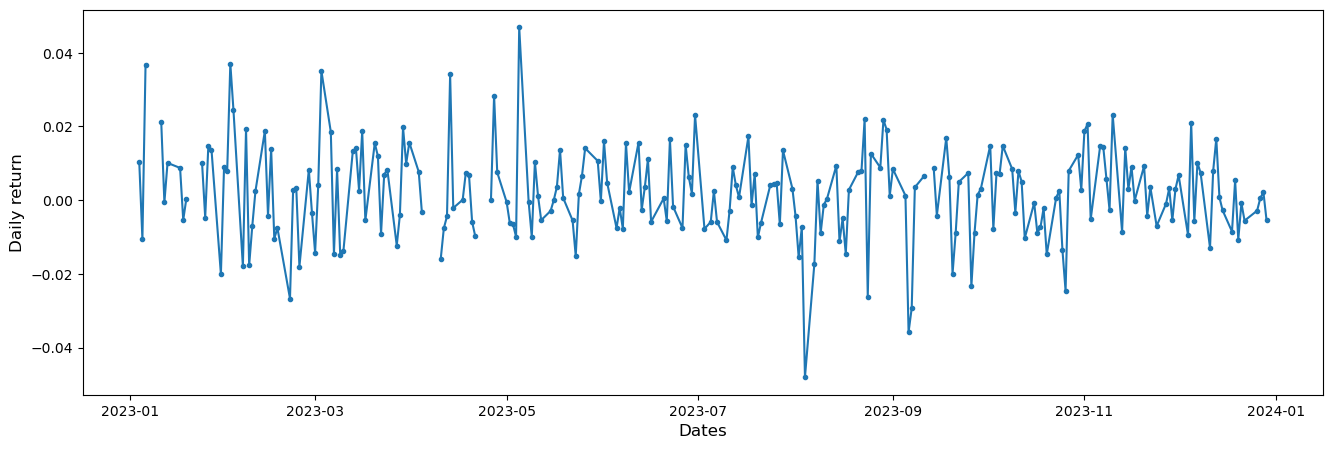

In [35]:
# First plot to see what daily return look like

plt.figure(figsize=(16,5))

plt.plot(df_remove.index,df_remove['Daily Return'].values, '.-')
plt.xlabel('Dates',fontsize=12)
plt.ylabel('Daily return', fontsize=12)

For random_state=3241, our missing_dates are '2023-01-09', '2023-09-12',  '2023-04-00', '2023-01-20'   '2023-04-0. Let's zoom in for better views.']

In [36]:
missing_dates[0]-np.timedelta64(1,'W')

numpy.datetime64('2023-01-02T00:00:00.000000000')

In [37]:
df_remove_1 = df_remove.loc[missing_dates[0]-np.timedelta64(1,'W'):missing_dates[0]+np.timedelta64(1,'W')].copy()

In [38]:
df_remove_1 = df_remove_1[1:]

In [39]:
df_remove_1.loc[df_remove_1.index]

,Open,High,Low,Close,Adj Close,Volume,Adj Close Prev,Daily Return
Date,,,,,,,,
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600.0,124.048042,0.010314
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700.0,125.327515,-0.010605
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700.0,123.998459,0.036794
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN,128.560867,NaN
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.661804,63896200.0,NaN,NaN
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.399261,69458900.0,129.661804,0.021112
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.319916,71379600.0,132.399261,-0.000599
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.658875,57809700.0,132.319916,0.010119


In [40]:
df.loc[df_remove_1.index].index

DatetimeIndex(['2023-01-04', '2023-01-05', '2023-01-06', '2023-01-09',
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13'],
              dtype='datetime64[ns]', name='Date', freq=None)

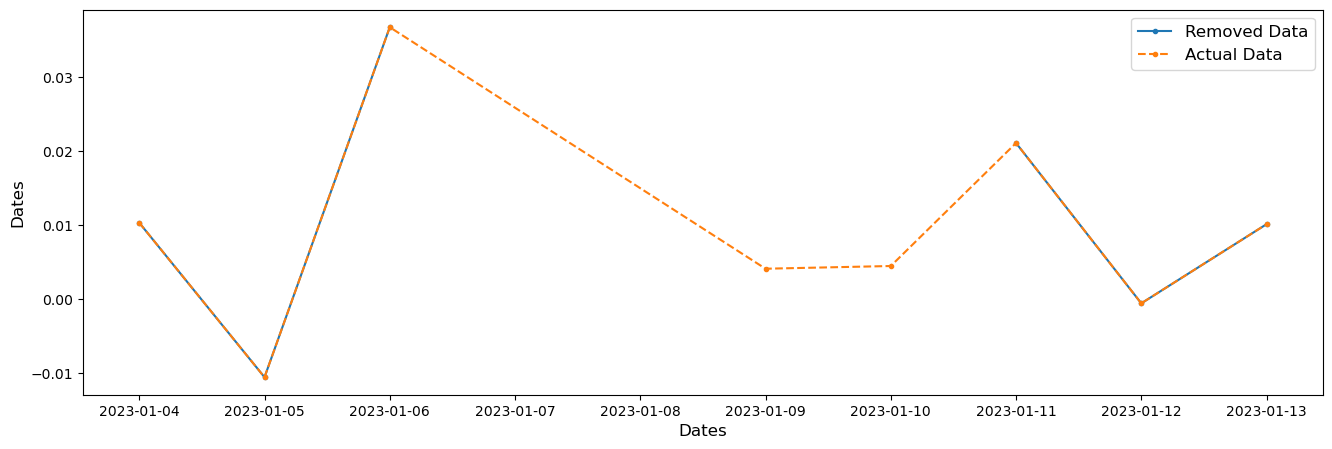

In [41]:
plt.figure(figsize=(16,5))

plt.plot(df_remove_1.index,df_remove_1['Daily Return'].values, '.-',label='Removed Data')
plt.plot(df_remove_1.index,df.loc[df_remove_1.index]['Daily Return'].values, '.--',label='Actual Data')

plt.legend(fontsize=12)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Dates', fontsize=12)

plt.show()

In [42]:
missing_date_1 = df_remove_1[df_remove_1['Daily Return'].isnull()].index
print(missing_date_1)

# First get the index integer of missing_date_1
t1 = pd.Timestamp(missing_date_1[0])
# Then get the index number of that index date
i1 = df_remove_1.index.get_loc(t1) - 1

t2 = pd.Timestamp(missing_date_1[-1])
i2 = df_remove_1.index.get_loc(t2) + 1

df_remove_1.iloc[i1]['Daily Return']

DatetimeIndex(['2023-01-09', '2023-01-10'], dtype='datetime64[ns]', name='Date', freq=None)


0.03679407380644945

In [51]:
# Find 2 nearest points that are not NA:

missing_date_1 = df_remove_1[df_remove_1['Daily Return'].isnull()].index

t1 = pd.Timestamp(missing_date_1[0])
# Then get the index number of that index date
i1 = df_remove_1.index.get_loc(t1) 

t2 = pd.Timestamp(missing_date_1[-1])
i2 = df_remove_1.index.get_loc(t2) 

y1 = df_remove_1.iloc[i1-1]['Daily Return'] #left index of the first missing point
y2 = df_remove_1.iloc[i2+1]['Daily Return'] #right index of the last missing point
# Slope of the linear interpolating
m = (y2 - y1)/(len(missing_date_1)+1)

df_remove_filled_1 = df_remove_1.copy()

pred = np.zeros(len(missing_date_1))

for i in range(len(missing_date_1)):
    pred[i] = y1 + m*(i+1)

for idx in range(len(missing_date_1)):
    df_remove_filled_1.loc[missing_date_1[idx],'Daily Return'] = y1+m*(idx+1)

In [52]:
pred

array([0.03156681, 0.02633955])

In [53]:
df_remove_filled_1

,Open,High,Low,Close,Adj Close,Volume,Adj Close Prev,Daily Return
Date,,,,,,,,
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600.0,124.048042,0.010314
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700.0,125.327515,-0.010605
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700.0,123.998459,0.036794
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN,128.560867,0.031567
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.661804,63896200.0,NaN,0.026340
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.399261,69458900.0,129.661804,0.021112
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.319916,71379600.0,132.399261,-0.000599
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.658875,57809700.0,132.319916,0.010119


In [54]:
df_remove_1

,Open,High,Low,Close,Adj Close,Volume,Adj Close Prev,Daily Return
Date,,,,,,,,
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327515,89113600.0,124.048042,0.010314
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700.0,125.327515,-0.010605
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700.0,123.998459,0.036794
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN,128.560867,NaN
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.661804,63896200.0,NaN,NaN
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.399261,69458900.0,129.661804,0.021112
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.319916,71379600.0,132.399261,-0.000599
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.658875,57809700.0,132.319916,0.010119


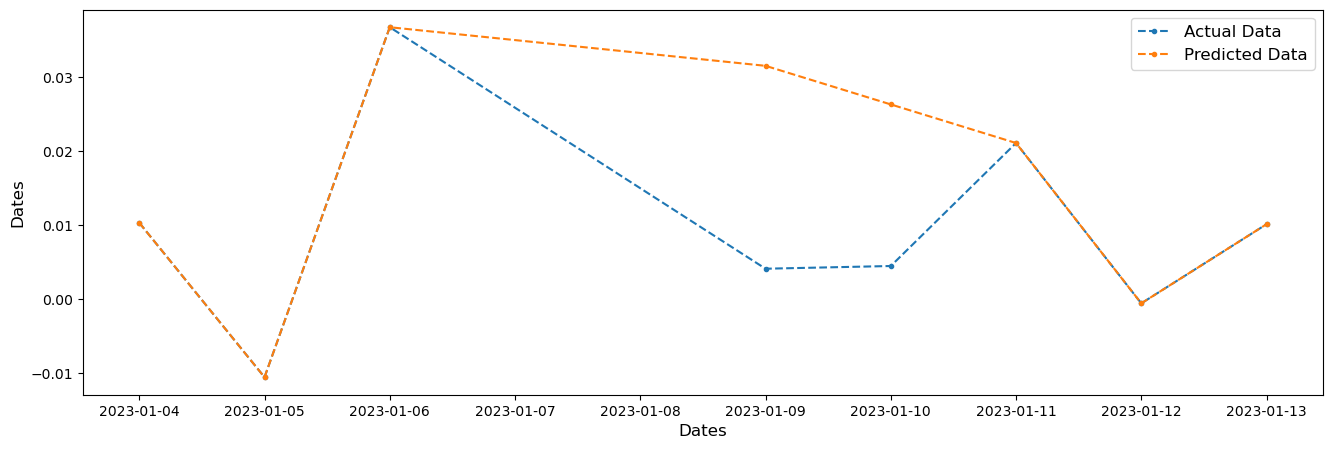

In [56]:
plt.figure(figsize=(16,5))

#plt.plot(df_remove_1.index,df_remove_1['Daily Return'].values, '.-',label='Removed Data')
plt.plot(df_remove_1.index,df.loc[df_remove_1.index]['Daily Return'].values, '.--',label='Actual Data')
plt.plot(df_remove_1.index,df_remove_filled_1.loc[df_remove_1.index]['Daily Return'].values, '.--',label='Predicted Data')


plt.legend(fontsize=12)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Dates', fontsize=12)

plt.show()